In [4]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np #for dtype

In [1]:
import os

In [5]:
train = pd.read_csv('train.csv')
# train.head()
# train.info()
listOfColumnsWithEmptyValues = []
for i in train.columns:
    if train[i].isnull().sum()>0:
        listOfColumnsWithEmptyValues.append(i)
# print(listOfColumnsWithEmptyValues)
list_mean = ['LotFrontage', 'MasVnrArea']
list_mode = ['MasVnrType','Electrical', 'GarageYrBlt']
list_newclass = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
categorical = []
for i in train.columns:
    if train[i].dtype == np.dtype('O'):
        categorical.append(i)
# print(len(categorical))
# print(categorical)

for i in list_newclass:
    train[i] = train[i].fillna(value="Class1")
for i in list_mean:
    train[i] = train[i].fillna(value=train[i].mean())
for i in list_mode:
    train[i] = train[i].fillna(value=train[i].mode()[0])


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [6]:
test = pd.read_csv('test.csv')
# print(test.info())
# print(test.head())
listOfColumnsWithEmptyValuesTest = []
for i in test.columns:
    if test[i].isnull().sum()>0:
        listOfColumnsWithEmptyValuesTest.append(i)
# print(listOfColumnsWithEmptyValuesTest)
list_mean_test = ['LotFrontage', 'MasVnrArea',  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']
list_mode_test = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',  'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageYrBlt', 'GarageCars' , 'SaleType']
list_newclass_test = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
categorical_test = []
for i in test.columns:
    if test[i].dtype == np.dtype('O'):
        categorical_test.append(i)
# print(len(categorical_test))
# print("categorical columns in test : ", categorical_test)

for i in list_newclass_test:
    test[i] = test[i].fillna(value="Class1")
for i in list_mean_test:
    test[i] = test[i].fillna(value=test[i].mean())
for i in list_mode_test:
    test[i] = test[i].fillna(value=test[i].mode()[0])

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
43
categorical columns in test :  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Pav

In [7]:
from sklearn import preprocessing as skp
for i in categorical:
#     print(i)
    le = skp.LabelEncoder()
    le.fit(train[i])
    train[i] = le.transform(train[i])
    test[i] = le.transform(test[i])
train = train.drop('Id', axis=1)
test = test.drop("Id", axis=1)
predictors = train[train.columns[:-1]]
output = train[train.columns[-1]]

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Evaluating various models

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
...    predictors, output, test_size=0.33, random_state=0)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_train)
pred_test = lr.predict(X_test)
print("Training R2Score", r2_score(pred, y_train))
print("Test R2Score", r2_score(pred_test, y_test))   
print("Training Error : ", mean_squared_error(pred, y_train))
print("Test Error     : ", mean_squared_error(pred_test, y_test))

Training R2Score 0.872910786829
Test R2Score 0.672299979901
Training Error :  701813678.629
Test Error     :  2279867993.99


In [108]:
X_train, X_test, y_train, y_test = train_test_split(
...    predictors, output, test_size=0.33, random_state=0)
from sklearn.ensemble import ExtraTreesRegressor
lr = ExtraTreesRegressor()
lr.fit(X_train, y_train)
pred = lr.predict(X_train)
pred_test = lr.predict(X_test)
print("Training R2Score", r2_score(pred, y_train))
print("Test R2Score", r2_score(pred_test, y_test))   
print("Training Error : ", mean_squared_error(pred, y_train))
print("Test Error     : ", mean_squared_error(pred_test, y_test))

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...    predictors, output, test_size=0.33, random_state=0)
from sklearn.ensemble import AdaBoostRegressor
lr = AdaBoostRegressor()
lr.fit(X_train, y_train)
pred = lr.predict(X_train)
pred_test = lr.predict(X_test)
print("Training R2Score", r2_score(pred, y_train))
print("Test R2Score", r2_score(pred_test, y_test))   
print("Training Error : ", mean_squared_error(pred, y_train))
print("Test Error     : ", mean_squared_error(pred_test, y_test))

In [18]:
# X_train, X_test, y_train, y_test = train_test_split(
# ...    predictors, output, test_size=0.33, random_state=0)
from sklearn.tree import DecisionTreeRegressor
lr = DecisionTreeRegressor()
lr.fit(X_train, y_train)
pred = lr.predict(X_train)
pred_test = lr.predict(X_test)
print("Training R2Score", r2_score(pred, y_train))
print("Test R2Score", r2_score(pred_test, y_test))   
print("Training Error : ", mean_squared_error(pred, y_train))
print("Test Error     : ", mean_squared_error(pred_test, y_test))

Training R2Score 1.0
Test R2Score 0.550376312184
Training Error :  0.0
Test Error     :  3765733545.6


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
...    predictors, output, test_size=0.33, random_state=42)
depth = []
r2score_train = []
r2_test = []
from sklearn.ensemble import RandomForestRegressor
# for i in range(1, 200):
lr = RandomForestRegressor(n_estimators=15, max_depth= 15
            )
i = 0
lr.fit(predictors, output)
pred = lr.predict(X_train)
pred_test = lr.predict(X_test)
print(i)
if(i%20==0):
    print("Training R2Score", r2_score(pred, y_train))
    print("Test R2Score", r2_score(pred_test, y_test))   
    print("Training Error : ", mean_squared_error(pred, y_train))
    print("Test Error     : ", mean_squared_error(pred_test, y_test))

depth.append(i)
r2score_train.append(r2_score(pred, y_train))
r2_test.append(r2_score(pred_test, y_test))
    #RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_split=1e-07, min_samples_leaf=1,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
#            verbose=0, warm_start=False)

0
Training R2Score 0.971378026001
Test R2Score 0.981328550015
Training Error :  154238282.295
Test Error     :  124740094.944


### Learning Curves

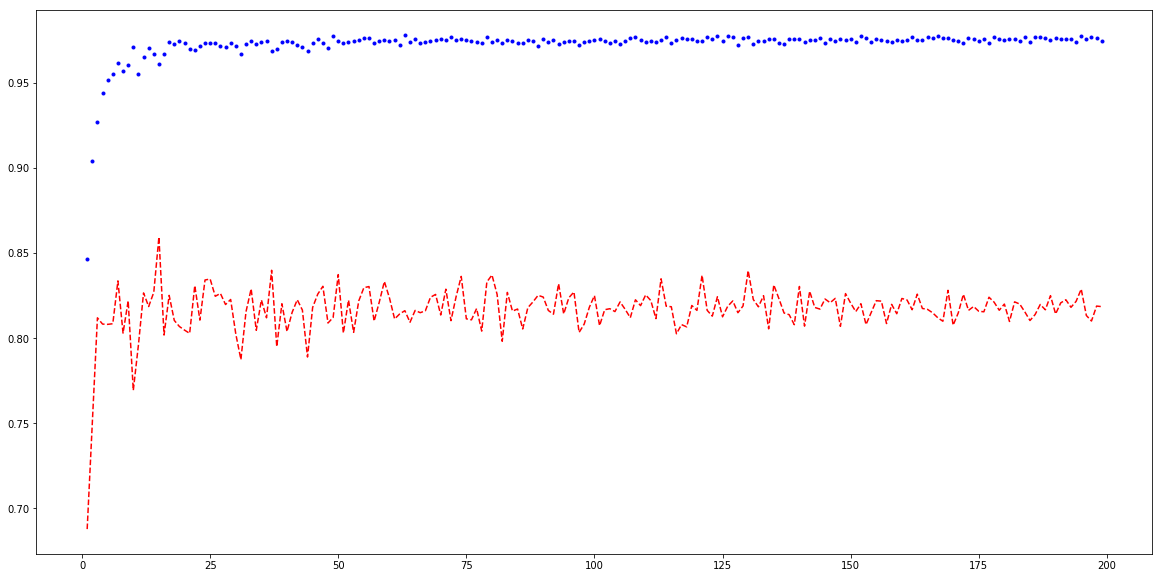

In [38]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(depth, r2_test, 'r--', depth, r2score_train, 'b.')
np.argmax(r2_test)
r2_test[14]

#### XGBOOST TRY

In [62]:
import xgboost as xgb
import xgboost.sklearn as xgbsklearn
from sklearn.model_selection import GridSearchCV 

In [63]:
xgr = xgbsklearn.XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [64]:
xgr.fit(predictors, output)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [85]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    target = "SalePrice"
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        print(cvresult.shape[0])
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain["SalePrice"])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
#     dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print ("Accuracy : %.4g" % r2_score(dtrain['SalePrice'].values, dtrain_predictions))
#     print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['SalePrice'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


128

Model Report
Accuracy : 0.9917


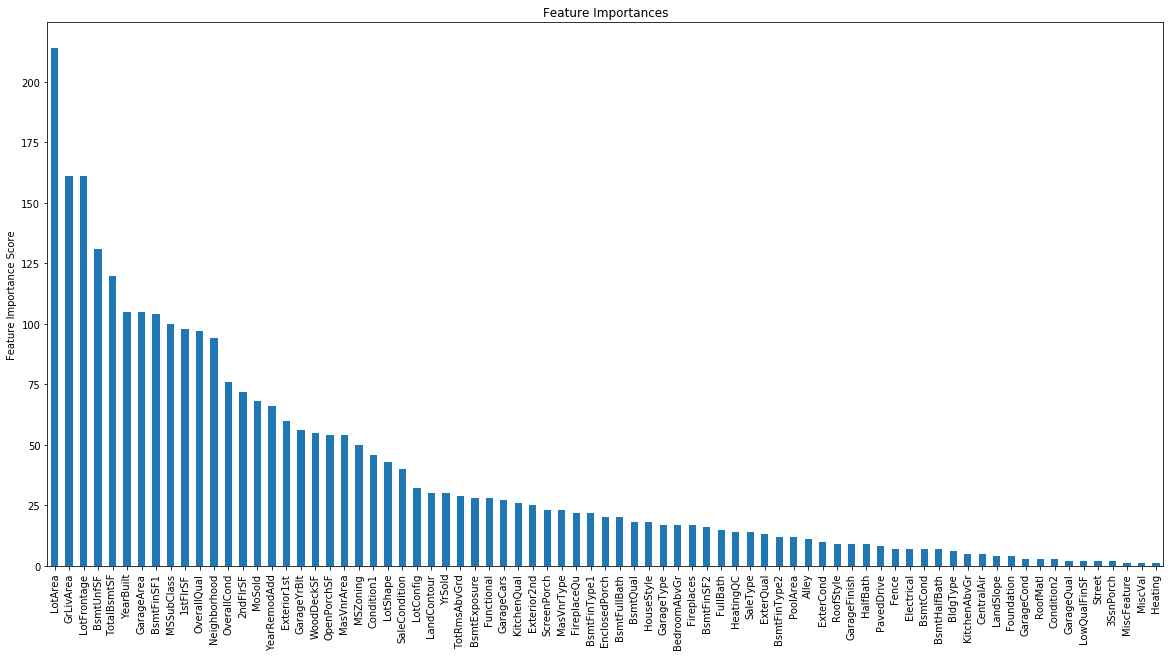

In [86]:
predictorsList = [x for x in train.columns if x not in ["SalePrice"]]
xgb1 = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictorsList)

In [87]:
r2_score(xgr.predict(predictors),output)

0.9594823745256077

Submission

In [34]:
submission = pd.read_csv("sample_submission.csv")
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [88]:
submission.SalePrice = xgr.predict(test)

In [89]:
# os.chdir('./Submissions/')
submission.to_csv("submission3_xgb_2.csv", index=False)